<h1>Visualizations

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
budget_by_genre = pd.read_csv('./cleaned_data/budget_by_genre.csv')

df_budget_genre_studio = pd.read_csv('./cleaned_data/budget_genre_studio.csv')

In [5]:
budget_by_genre.tail()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
1542,1542,49,"Sep 1, 2015",Exeter,25000.0,0.0,489792.0,2015,0.0,489792.0,tt1945044,Exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller","['Horror', 'Mystery', 'Thriller']"
1543,1543,49,"Sep 1, 2015",Exeter,25000.0,0.0,489792.0,2015,0.0,489792.0,tt4931374,Exeter,Exeter,2015,92.0,NaN,NaN
1544,1544,52,"Dec 1, 2015",Dutch Kills,25000.0,0.0,0.0,2015,0.0,0.0,tt2759066,Dutch Kills,Dutch Kills,2015,90.0,"Crime,Drama,Thriller","['Crime', 'Drama', 'Thriller']"
1545,1545,59,"Nov 25, 2011",The Ridges,17300.0,0.0,0.0,2011,0.0,0.0,tt1781935,The Ridges,The Ridges,2011,89.0,"Drama,Horror,Thriller","['Drama', 'Horror', 'Thriller']"
1546,1546,62,"Dec 31, 2014",Stories of Our Lives,15000.0,0.0,0.0,2014,0.0,0.0,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,['Drama']


In [6]:
budget_by_genre['genre'] = budget_by_genre['genres'].str.split(",")
df_genre = budget_by_genre.explode('genre')
df_genre.drop(columns = ['Unnamed: 0', 'id', 'release_date', 'production_budget', 'domestic_gross', \
                         'worldwide_gross', 'primary_title', 'domestic_profit', 'original_title', 'start_year', \
                         'runtime_minutes', 'genres', 'genre_list', 'movie', 'tconst'], inplace = True)
df_genre = df_genre[df_genre['worldwide_profit'] > 0.1]
df_genre['worldwide_profit'] = df_genre['worldwide_profit'] / 1000000
df_genre['worldwide_profit'] = df_genre['worldwide_profit'].round(1)
df_genre

,year,worldwide_profit,genre
0,2011,1045.7,Action
0,2011,1045.7,Adventure
0,2011,1045.7,Fantasy
1,2019,149.8,Action
1,2019,149.8,Adventure
...,...,...,...
1541,2017,0.0,Drama
1542,2015,0.5,Horror
1542,2015,0.5,Mystery
1542,2015,0.5,Thriller


In [7]:
df_hmap = pd.pivot_table(data=df_genre,
                    index='genre',
                    values='worldwide_profit',
                    columns='year')

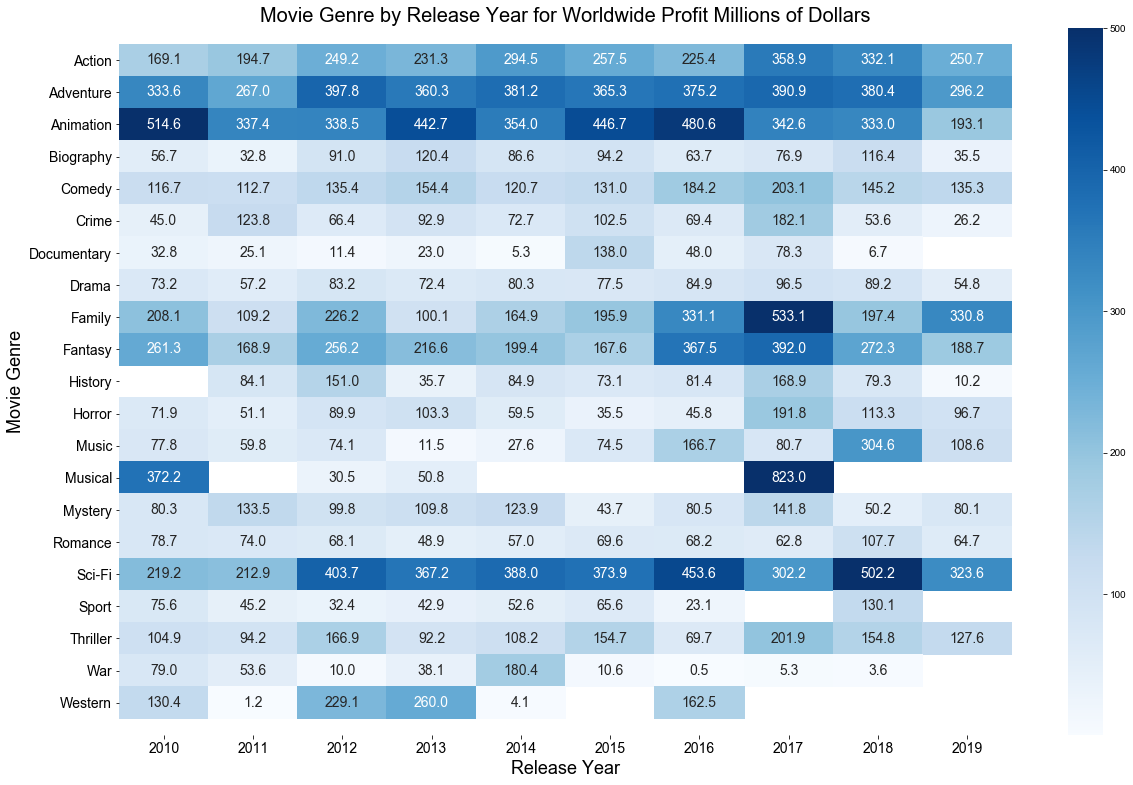

In [8]:
plt.subplots(figsize=(20,13))
plt.title('Movie Genre by Release Year for Worldwide Profit Millions of Dollars', fontsize = 20)
h_map = sns.heatmap(df_hmap, cmap="Blues", annot=True, annot_kws={"size": 14}, fmt=".1f", vmax=500)
h_map.set_xticklabels(h_map.get_xmajorticklabels(), fontsize = 14)
h_map.set_yticklabels(h_map.get_ymajorticklabels(), fontsize = 14)
bottom, top = h_map.get_ylim()
h_map.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('Movie Genre', fontsize = 18)
sns.set(font_scale = 1.4)
plt.savefig('heatmap_genre.png')
plt.show()

In [9]:
df_budget_genre_studio.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,...,worldwide_roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,title,studio
0,0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,6.350639e+08,...,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy","['Action', 'Adventure', 'Fantasy']",Pirates of the Caribbean: On Stranger Tides,BV
1,1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,128405868.0,1.072414e+09,...,4.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi","['Action', 'Adventure', 'Sci-Fi']",Avengers: Age of Ultron,BV
2,2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,378815482.0,1.748134e+09,...,6.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi","['Action', 'Adventure', 'Sci-Fi']",Avengers: Infinity War,BV
3,3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,2017,-70975705.0,3.559452e+08,...,2.186484,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy","['Action', 'Adventure', 'Fantasy']",Justice League,WB
4,4,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,2015,-99925825.0,5.796209e+08,...,2.932070,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller","['Action', 'Adventure', 'Thriller']",Spectre,Sony


In [10]:
# This cell preps a main dataframe to generate bar charts used to display the top studios by top genre and worldwide profit
df_budget_genre_studio['genre'] = df_budget_genre_studio['genres'].str.split(",")
df_studio = df_budget_genre_studio.explode('genre')

df_studio.drop(columns = ['Unnamed: 0', 'id', 'release_date', 'production_budget', 'domestic_gross', \
                         'worldwide_gross', 'primary_title', 'domestic_profit', 'original_title', 'start_year', \
                         'runtime_minutes', 'genres', 'genre_list', 'movie', 'tconst', 'title', 'domestic_roi'], inplace = True)
df_studio = df_studio[df_studio['worldwide_profit'] > 0.1]
df_studio['worldwide_profit'] = df_studio['worldwide_profit'] / 1000000
df_studio['worldwide_profit'] = df_studio['worldwide_profit'].round(1)
df_studio = df_studio.groupby(['genre', 'studio']).mean()
df_studio.drop(['Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Music', 'Musical', \
                'Mystery', 'Romance', 'History', 'Horror', 'Sport', 'Thriller', 'War', 'Western'], inplace = True)

In [11]:
# This cell creates sub dataframes from the main dataframe above.
df_action = df_studio.copy()
df_action.drop(['Adventure', 'Animation', 'Fantasy', 'Sci-Fi'], inplace = True)
df_action.sort_values(by='worldwide_profit', ascending=False)
df_action = pd.pivot_table(data = df_action,
                    index ='studio',
                    values ='worldwide_profit',
                    columns ='genre')
df_action.sort_values('Action', ascending = False, inplace = True)
df_action = df_action.head()

df_adventure = df_studio.copy()
df_adventure.drop(['Action', 'Animation', 'Fantasy', 'Sci-Fi'], inplace = True)
df_adventure = pd.pivot_table(data = df_adventure,
                    index ='studio',
                    values ='worldwide_profit',
                    columns ='genre')
df_adventure.sort_values('Adventure', ascending = False, inplace = True)
df_adventure = df_adventure.head()

df_animation = df_studio.copy()
df_animation.drop(['Action', 'Adventure', 'Fantasy', 'Sci-Fi'], inplace = True)
df_animation = pd.pivot_table(data = df_animation,
                    index ='studio',
                    values ='worldwide_profit',
                    columns ='genre')
df_animation.sort_values('Animation', ascending = False, inplace = True)
df_animation = df_animation.head()

df_fantasy = df_studio.copy()
df_fantasy.drop(['Action', 'Adventure', 'Animation', 'Sci-Fi'], inplace = True)
df_fantasy = pd.pivot_table(data = df_fantasy,
                    index ='studio',
                    values ='worldwide_profit',
                    columns ='genre')
df_fantasy.sort_values('Fantasy', ascending = False, inplace = True)
df_fantasy = df_fantasy.head()

df_sci_fi = df_studio.copy()
df_sci_fi.drop(['Action', 'Adventure', 'Animation', 'Fantasy'], inplace = True)
df_sci_fi = pd.pivot_table(data = df_sci_fi,
                    index ='studio',
                    values ='worldwide_profit',
                    columns ='genre')
df_sci_fi.sort_values('Sci-Fi', ascending = False, inplace = True)
df_sci_fi = df_sci_fi.head()

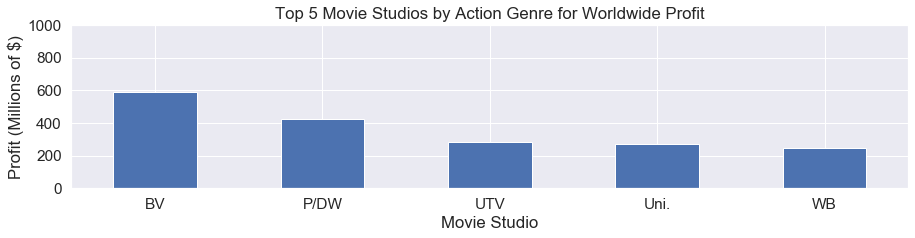

In [12]:
df_action.plot.bar(rot = 0, figsize = (15,3), legend = None)
plt.xlabel('Movie Studio')
plt.ylabel('Profit (Millions of $)')
plt.title('Top 5 Movie Studios by Action Genre for Worldwide Profit')
plt.ylim(top = 1000)
plt.savefig('bar_chart_action.png')
plt.show()

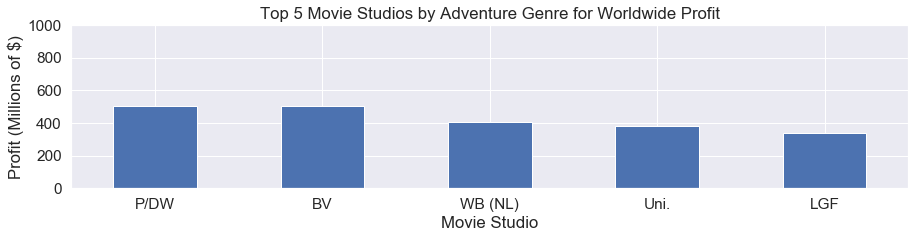

In [13]:
df_adventure.plot.bar(rot = 0, figsize = (15,3), legend = None)
plt.xlabel('Movie Studio')
plt.ylabel('Profit (Millions of $)')
plt.title('Top 5 Movie Studios by Adventure Genre for Worldwide Profit')
plt.ylim(top = 1000)
plt.savefig('bar_chart_adventure.png')
plt.show()

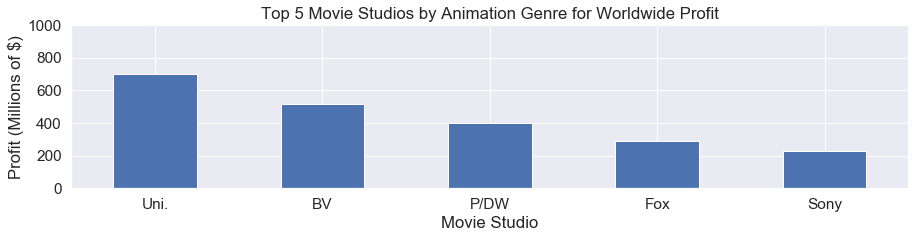

In [14]:
df_animation.plot.bar(rot = 0, figsize = (15,3), legend = None)
plt.xlabel('Movie Studio')
plt.ylabel('Profit (Millions of $)')
plt.title('Top 5 Movie Studios by Animation Genre for Worldwide Profit')
plt.ylim(top = 1000)
plt.savefig('bar_chart_animation.png')
plt.show()

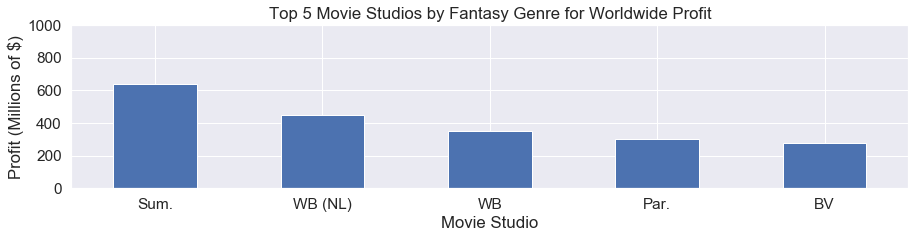

In [15]:
df_fantasy.plot.bar(rot = 0, figsize = (15,3), legend = None)
plt.xlabel('Movie Studio')
plt.ylabel('Profit (Millions of $)')
plt.title('Top 5 Movie Studios by Fantasy Genre for Worldwide Profit')
plt.ylim(top = 1000)
plt.savefig('bar_chart_fantasy.png')
plt.show()

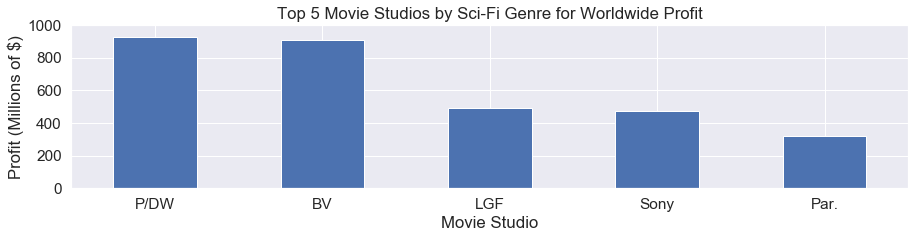

In [16]:
df_sci_fi.plot.bar(rot = 0, figsize = (15,3), legend = None)
plt.xlabel('Movie Studio')
plt.ylabel('Profit (Millions of $)')
plt.title('Top 5 Movie Studios by Sci-Fi Genre for Worldwide Profit')
plt.ylim(top = 1000)
plt.savefig('bar_chart_sci_fi.png')
plt.show()

In [34]:
dir(genre_bars_fig)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_xlabel_grp',
 '_align_ylabel_grp',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_dpi',
 '_gci',
 '_get_axes',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutbox',
 '_make_key',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_ax',
 '_remove_method',
 '_repr_html_',
 '_set

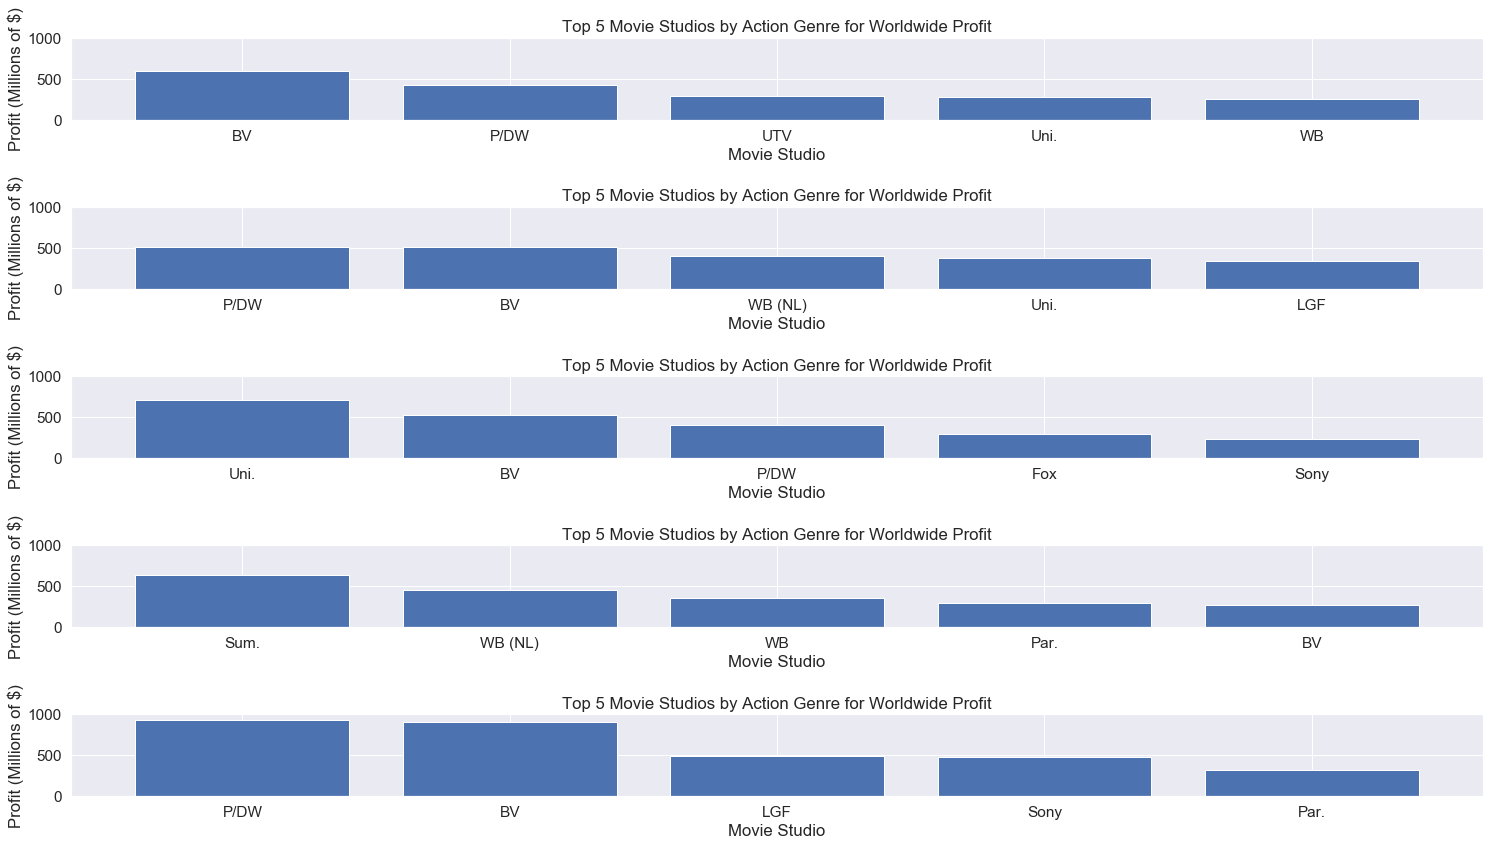

In [36]:
#Create figure obj
genre_bars_fig = plt.figure(figsize=(21, 12))

#Create Action subplot
action_bars = genre_bars_fig.add_subplot(511)

#Create Adventure subplot
adventure_bars = genre_bars_fig.add_subplot(512)

#Create Animation subplot
animation_bars = genre_bars_fig.add_subplot(513)

#Create Fantasy subplot
fantasy_bars = genre_bars_fig.add_subplot(514)

#Create Sci-Fi subplot
sci_fi_bars = genre_bars_fig.add_subplot(515)

#Plot action bars
action_bars.bar(x = df_action.index, height = df_action.Action)
action_bars.set_xlabel('Movie Studio')
action_bars.set_ylabel('Profit (Millions of $)')
action_bars.set_title('Top 5 Movie Studios by Action Genre for Worldwide Profit')
action_bars.set_ylim(top = 1000)

#Plot adventure bars
adventure_bars.bar(x = df_adventure.index, height = df_adventure.Adventure)
adventure_bars.set_xlabel('Movie Studio')
adventure_bars.set_ylabel('Profit (Millions of $)')
adventure_bars.set_title('Top 5 Movie Studios by Action Genre for Worldwide Profit')
adventure_bars.set_ylim(top = 1000)

#Plot animation bars
animation_bars.bar(x = df_animation.index, height = df_animation.Animation)
animation_bars.set_xlabel('Movie Studio')
animation_bars.set_ylabel('Profit (Millions of $)')
animation_bars.set_title('Top 5 Movie Studios by Action Genre for Worldwide Profit')
animation_bars.set_ylim(top = 1000)

#Plot fantasy bars
fantasy_bars.bar(x = df_fantasy.index, height = df_fantasy.Fantasy)
fantasy_bars.set_xlabel('Movie Studio')
fantasy_bars.set_ylabel('Profit (Millions of $)')
fantasy_bars.set_title('Top 5 Movie Studios by Action Genre for Worldwide Profit')
fantasy_bars.set_ylim(top = 1000)

#Plot sci-fi bars
sci_fi_bars.bar(x = df_sci_fi.index, height = df_sci_fi['Sci-Fi'])
sci_fi_bars.set_xlabel('Movie Studio')
sci_fi_bars.set_ylabel('Profit (Millions of $)')
sci_fi_bars.set_title('Top 5 Movie Studios by Action Genre for Worldwide Profit')
sci_fi_bars.set_ylim(top = 1000)

genre_bars_fig.set_tight_layout(True)

genre_bars_fig.savefig('bar_chart_top_fives_studios.png')
